In [41]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
import pandas as pd
dataset=pd.read_csv("pima-indians-diabetes.csv")

In [3]:
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
column_names=['pregnant_count','plasma_glucose','bp','skin_thickness','insulin','bmi','dpf','age','label']
dataset=pd.read_csv("pima-indians-diabetes.csv",names=column_names)

In [6]:
dataset

,pregnant_count,plasma_glucose,bp,skin_thickness,insulin,bmi,dpf,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
dataset.isnull().sum()

pregnant_count    0
plasma_glucose    0
bp                0
skin_thickness    0
insulin           0
bmi               0
dpf               0
age               0
label             0
dtype: int64

C:\Users\dimbl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

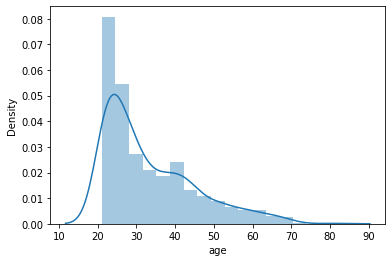

In [11]:
import seaborn as sns
sns.distplot(dataset['age'])

## Right Skewed
## positive Skewed
## median bigger than mean

C:\Users\dimbl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

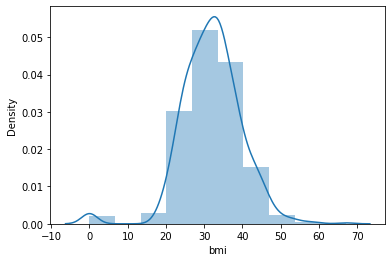

In [12]:
sns.distplot(dataset['bmi'],bins=10)

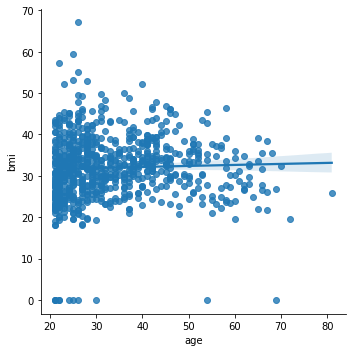

In [13]:
# plotting age against bmi
# found they are not correlated
sns.lmplot(x='age',y='bmi',data=dataset)

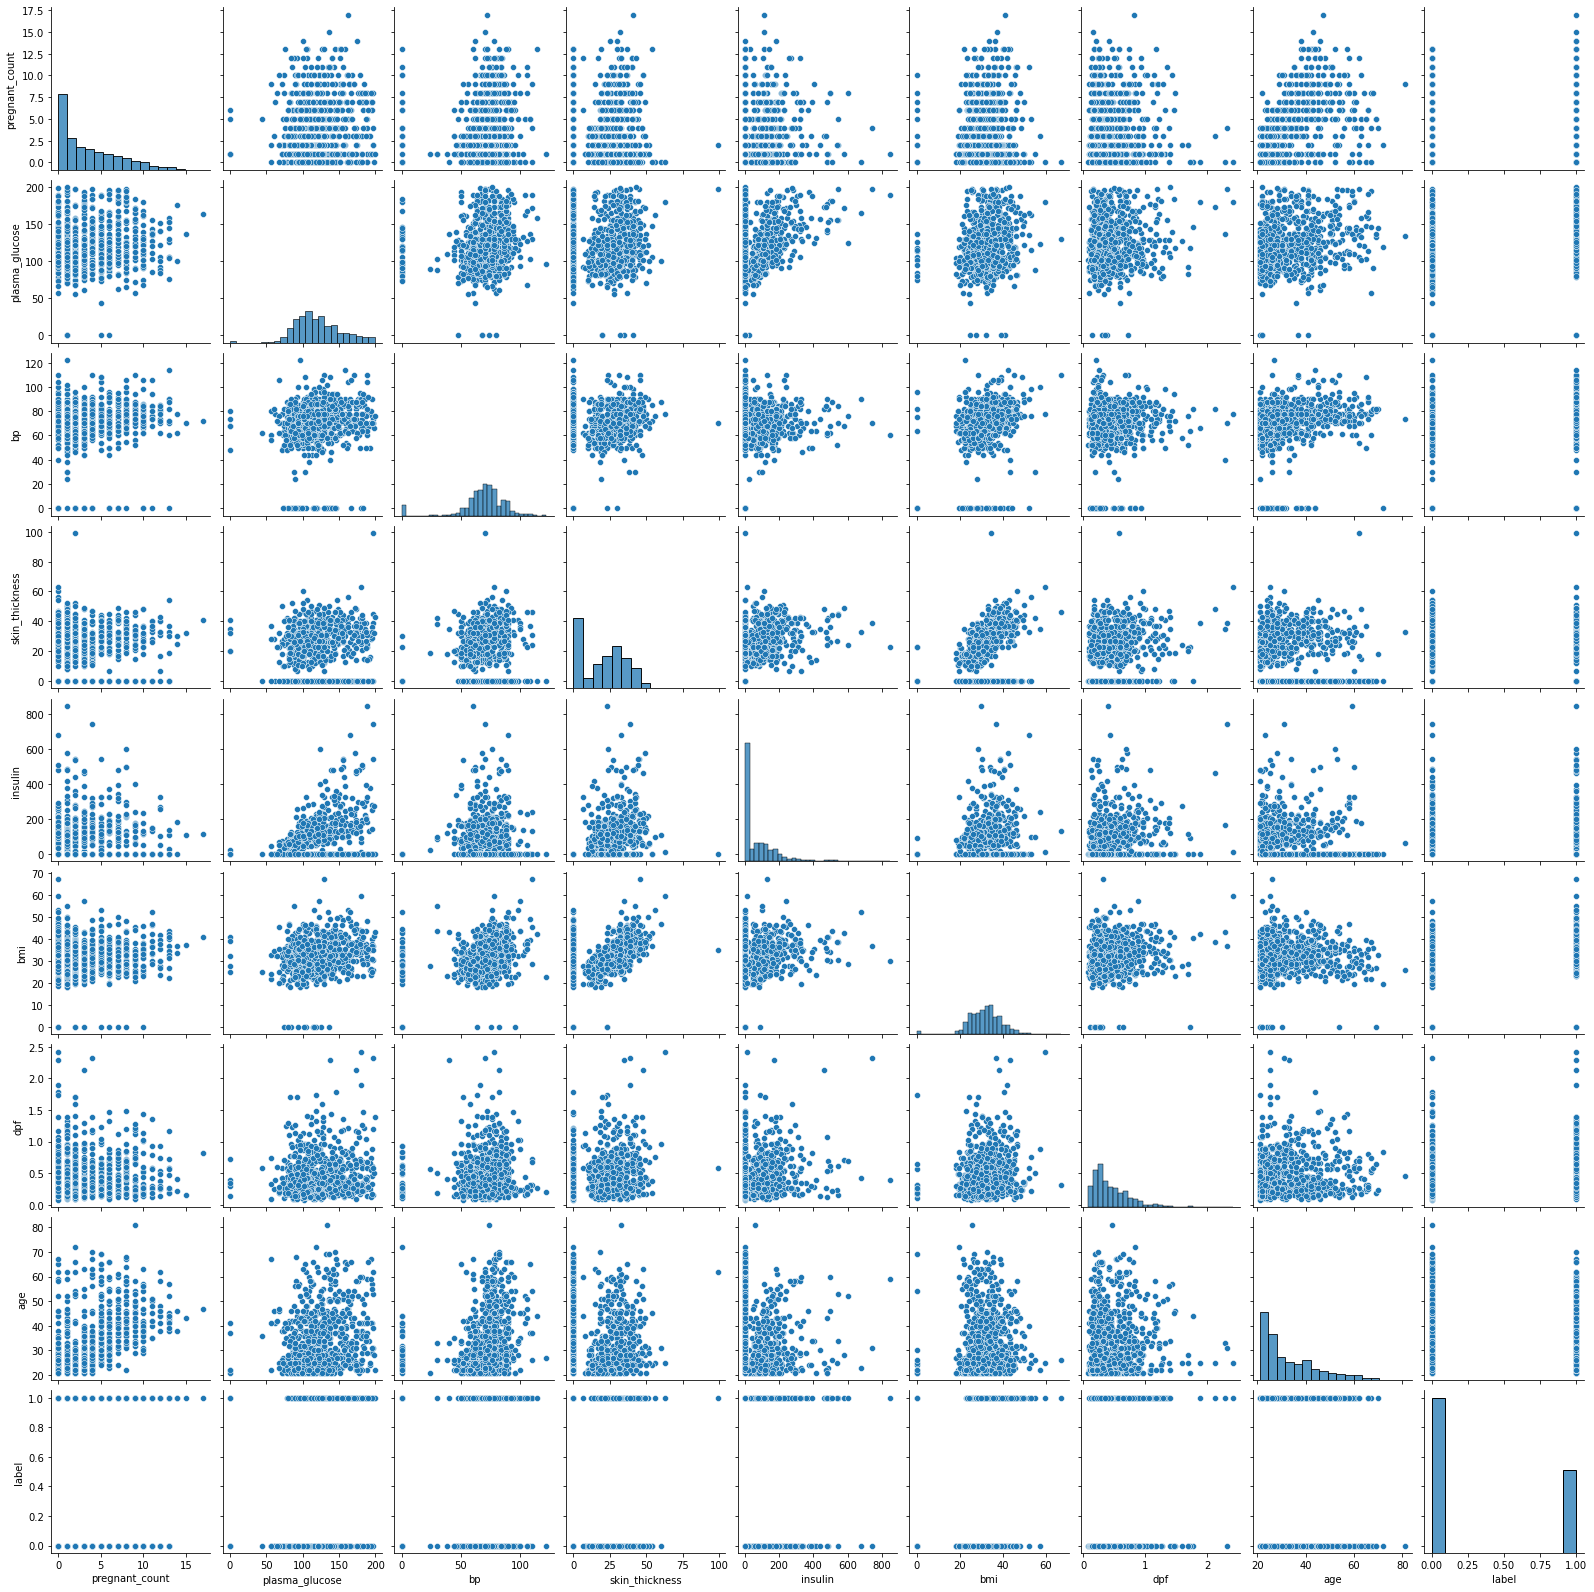

In [14]:
sns.pairplot(dataset)

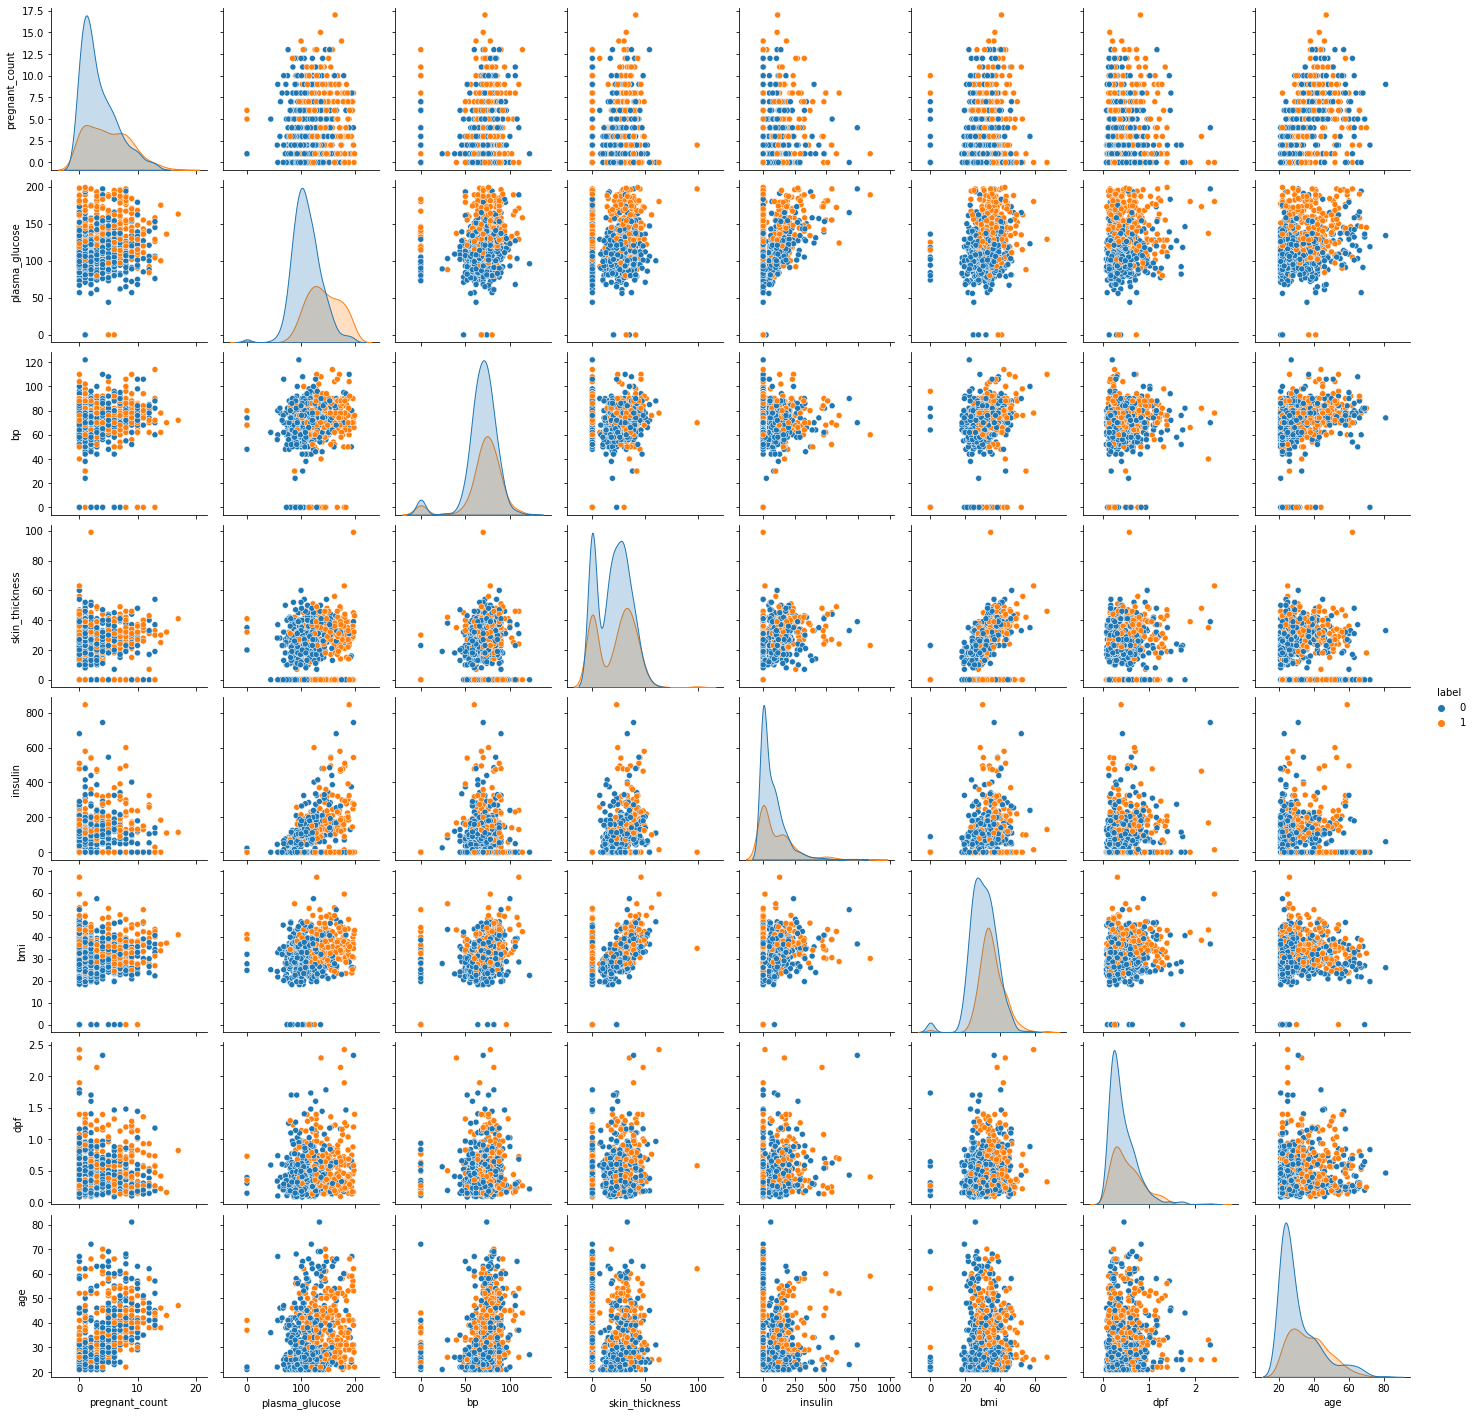

In [15]:
sns.pairplot(dataset,hue='label')

<AxesSubplot:>

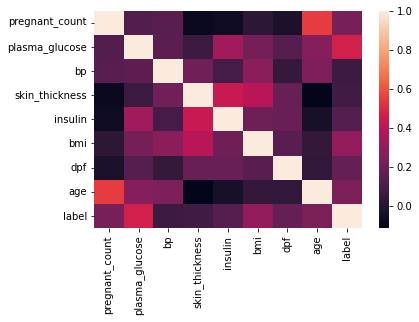

In [16]:
sns.heatmap(dataset.corr())

In [19]:
X=dataset.drop('label',axis=1)
y=dataset.label
X.shape,y.shape

((768, 8), (768,))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [29]:
# normalization (to bring all the values in a common compairable range)
# StandardScaler, MinMaxScaler


In [35]:
def feature_norm(X_train, X_test):
    sc=StandardScaler()
    sc.fit(X_train) #------------fit is done only with train data and the mean and std hence obtained is used in training data
    sc.transform(X_train)#-------------------------------------this can be done together using fit_transform()
    sc.transform(X_test)
    return X_train,X_test

In [36]:
X_train, X_test=feature_norm(X_train,X_test)

# Linear Regression

In [53]:
reg= LinearRegression()
reg.fit(X_train,y_train)
y_predict_1=reg.predict(X_test)
y_predict_1

array([ 0.06509436,  0.54017362,  0.43820816,  0.42902565,  0.11404249,
        0.74179418,  0.41103794,  0.24843944,  0.24532104,  0.20351314,
        0.22658966, -0.13801959,  0.11665923,  0.29703282,  0.97770628,
        0.12256276, -0.18317868,  0.25950737,  0.5502912 ,  0.37802084,
        0.80943468,  0.03438382,  0.36960592,  0.2777271 ,  0.19800707,
        0.32678352,  0.19166987,  0.00490867,  0.57599564,  0.11831851,
        0.31779581,  0.39110343,  0.48144563,  0.38739087,  0.06155891,
        0.07486494,  0.38689477,  0.1112336 ,  0.45101693,  0.32399198,
        0.13866897,  0.20808417,  0.6656434 ,  0.35426613,  0.83730498,
       -0.07695142,  0.95182342,  0.40474293,  0.59403686,  0.63307209,
        0.32662685,  0.31621935, -0.05413718, -0.00701208,  0.36383578,
        0.1460033 ,  0.30552851,  0.10405179,  0.58974249,  0.29154463,
       -0.1399728 ,  0.68827407,  0.63989685,  0.74634726,  0.37655731,
        0.28975957,  0.09601559,  0.69299665,  0.39981673,  0.83

In [56]:
import numpy as np
y_pred_classes = np.round(y_predict_1).astype(int)
y_pred_classes

array([ 0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  0, -1,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,
        0])

In [58]:
evaluate_model(y_test,y_pred_classes)


Accuracy score : 0.7727272727272727
confusion_matrix : [[ 0  0  0]
 [ 1 89  9]
 [ 0 25 30]]
classification_report :               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.78      0.90      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.77       154
   macro avg       0.52      0.48      0.49       154
weighted avg       0.78      0.77      0.77       154



C:\Users\dimbl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimbl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dimbl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

# Logistic Regression

In [43]:
reg1= LogisticRegression()
reg1.fit(X_train,y_train)
y_predict=reg1.predict(X_test)

C:\Users\dimbl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def evaluate_model(y_test,y_pred):
    print("Accuracy score :",  accuracy_score(y_test,y_pred))
    print("confusion_matrix :",confusion_matrix(y_test,y_pred))
    print("classification_report :",classification_report(y_test,y_pred))

In [49]:
evaluate_model(y_test,y_predict)

Accuracy score : 0.7792207792207793
confusion_matrix : [[90  9]
 [25 30]]
classification_report :               precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

